/tmp/ipykernel_13932/2099353152.py:10: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))
/tmp/ipykernel_13932/2099353152.py:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))


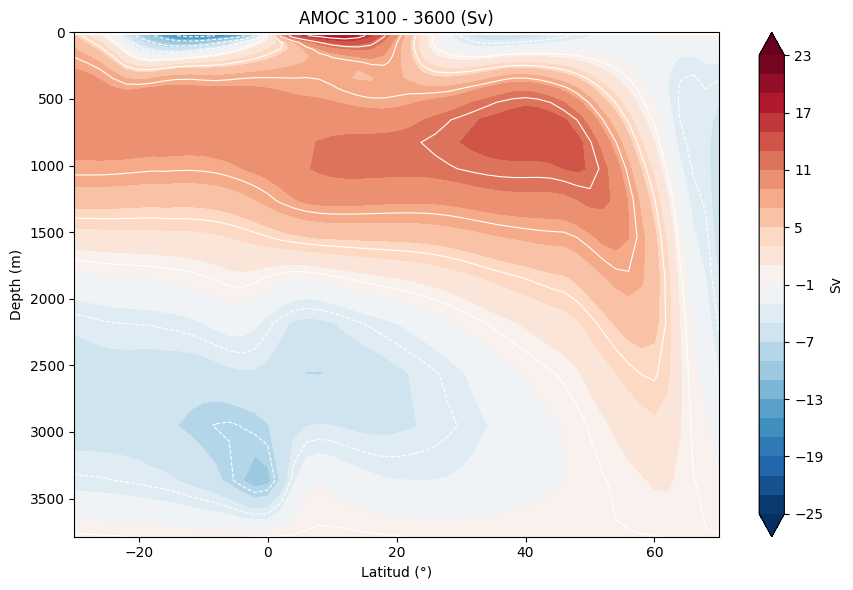

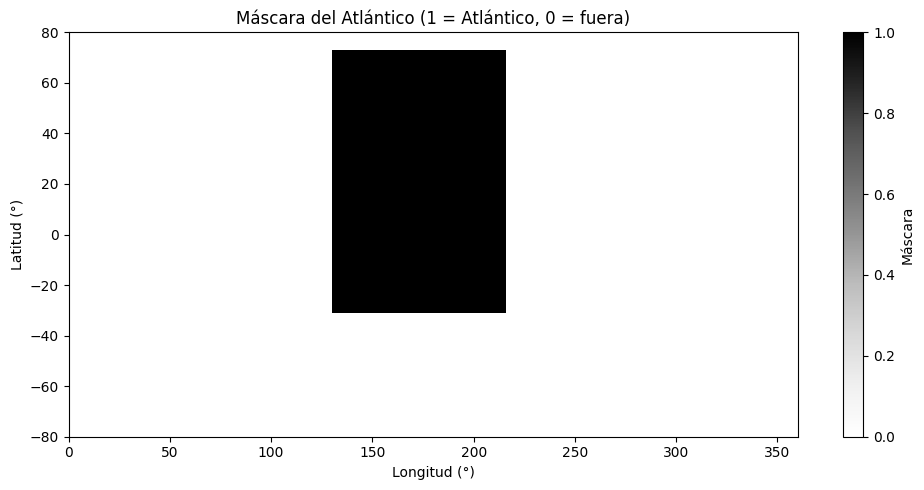

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os


ruta_base = "/home/laura/Tesis"


flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))

ty_trans = flux_ds["ty_trans"].mean(dim="time")
ty_trans_gm = flux_ds["ty_trans_gm"].mean(dim="time")



xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]


lon_mask = ((xt >= 131) & (xt <= 215)) 
lat_mask = (yu >= -30) & (yu <= 72)

mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0)

mask = xr.zeros_like(ty_trans)
for k in range(mask.sizes["st_ocean"]):
    mask[k, :, :] = mask_2d


ty_trans_masked = ty_trans * mask
ty_trans_gm_masked = ty_trans_gm * mask



total_ty_zonal = ty_trans_masked.sum(dim="xt_ocean")
total_ty_gm = ty_trans_gm_masked.sum(dim="xt_ocean")
amoc = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_gm



plt.figure(figsize=(9, 6))
levels = np.arange(-25, 25, 2)

cf = plt.contourf(yu, st, amoc, levels=levels, cmap="RdBu_r", extend="both")


contour_levels = np.arange(-16, 20, 4)
plt.contour(yu, st, amoc, levels=contour_levels, colors='white', linewidths=0.8)


max_idx = np.unravel_index(np.nanargmax(amoc.values), amoc.shape)
plt.contour(yu, st, amoc, levels=[amoc.values[max_idx]], colors='k', linewidths=1.5)


plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 3501, 500))
plt.xlim(-30, 70)
plt.xlabel("Latitud (°)")
plt.ylabel("Depth (m)")
plt.title("AMOC 3100 - 3600 (Sv)")
cbar = plt.colorbar(cf)
cbar.set_label("Sv")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.pcolormesh(xt, yu, mask.isel(st_ocean=0), cmap="Greys", shading="auto")

plt.title("Máscara del Atlántico (1 = Atlántico, 0 = fuera)")
plt.xlabel("Longitud (°)")
plt.ylabel("Latitud (°)")
plt.colorbar(label="Máscara")
plt.xlim(0, 360)
plt.ylim(-80, 80)
plt.tight_layout()
plt.show()


/tmp/ipykernel_13932/267838853.py:9: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))
/tmp/ipykernel_13932/267838853.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))


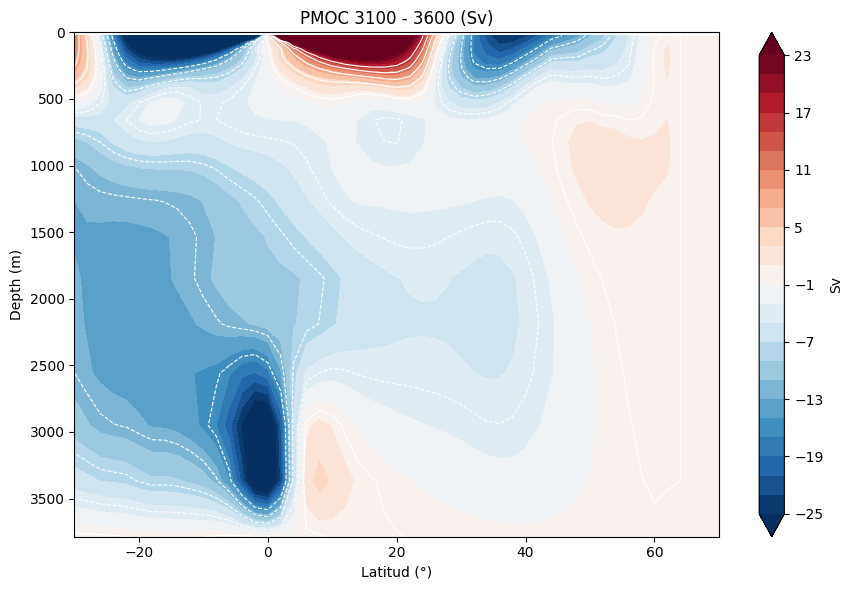

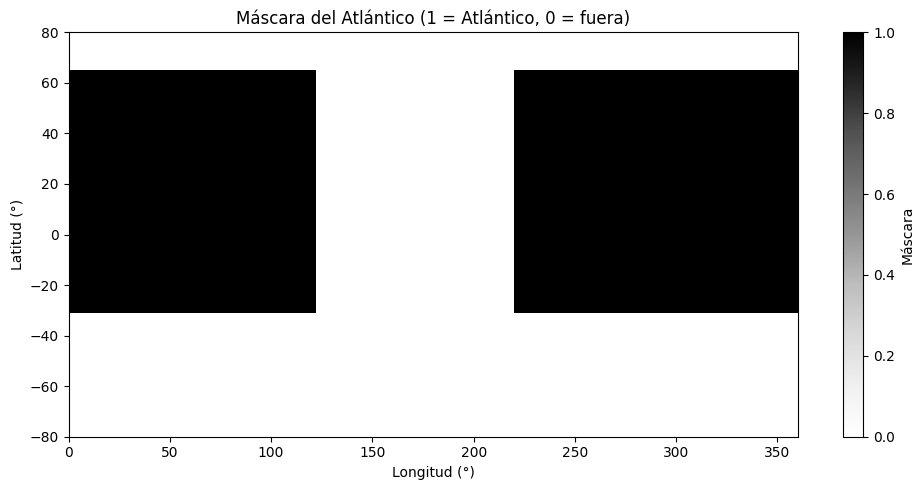

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

ruta_base = "/home/laura/Tesis"


flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))


ty_trans = flux_ds["ty_trans"].isel(time=0)
ty_trans_gm = flux_ds["ty_trans_gm"].isel(time=0)


xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]


lon_mask = ((xt >= 0) & (xt <= 121)) | ((xt >= 221) & (xt <= 360))

lat_mask = (yu >= -30) & (yu <= 64)


mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0)


mask = xr.zeros_like(ty_trans)
for k in range(mask.sizes["st_ocean"]):
    mask[k, :, :] = mask_2d

ty_trans_masked = ty_trans * mask
ty_trans_gm_masked = ty_trans_gm * mask
total_ty = ty_trans_masked


total_ty_zonal = total_ty.sum(dim="xt_ocean")
total_ty_gm = ty_trans_gm_masked.sum(dim="xt_ocean")
amoc = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_gm

plt.figure(figsize=(9, 6))
levels = np.arange(-25, 25, 2)

cf = plt.contourf(yu, st, amoc, levels=levels, cmap="RdBu_r", extend="both")

contour_levels = np.arange(-16, 20, 4)
plt.contour(yu, st, amoc, levels=contour_levels, colors='white', linewidths=0.8)

max_idx = np.unravel_index(np.nanargmax(amoc.values), amoc.shape)
plt.contour(yu, st, amoc, levels=[amoc.values[max_idx]], colors='k', linewidths=1.5)

plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 3501, 500))
plt.xlim(-30, 70)
plt.xlabel("Latitud (°)")
plt.ylabel("Depth (m)")
plt.title("PMOC 3100 - 3600 (Sv)")
cbar = plt.colorbar(cf)
cbar.set_label("Sv")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.pcolormesh(xt, yu, mask.isel(st_ocean=0), cmap="Greys", shading="auto")

plt.title("Máscara del Atlántico (1 = Atlántico, 0 = fuera)")
plt.xlabel("Longitud (°)")
plt.ylabel("Latitud (°)")
plt.colorbar(label="Máscara")
plt.xlim(0, 360)
plt.ylim(-80, 80)
plt.tight_layout()
plt.show()


/tmp/ipykernel_18081/1270556069.py:9: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_ocean_flux.nc"))
/tmp/ipykernel_18081/1270556069.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_ocean_flux.nc"))


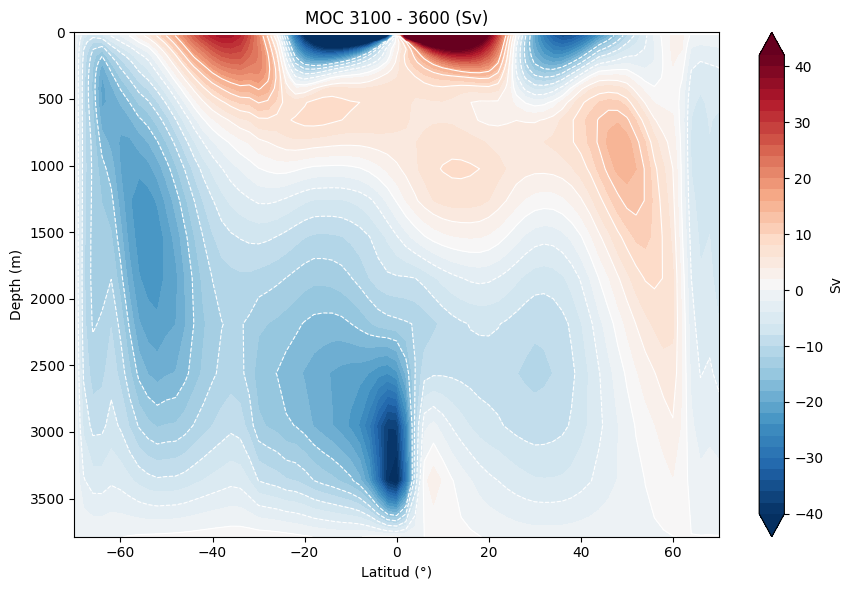

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

ruta_base = "/home/laura/Tesis"


flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_ocean_flux.nc"))


ty_trans = flux_ds["ty_trans"].isel(time=0)
ty_trans_gm = flux_ds["ty_trans_gm"].isel(time=0)

xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]


lon_mask = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))

lat_mask = (yu >= -68) & (yu <= -31)

lon_maskA = ((xt >= 130) & (xt <= 217)) 

lat_maskA = (yu >= -30) & (yu <= 72)

lon_maskP = ((xt >= 0) & (xt <= 125)) | ((xt >= 223) & (xt <= 360))

lat_maskP = (yu >= -30) & (yu <= 64)

sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -66 ) & (yu < -54)

mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0) + xr.where(sqr_mask_x, 1.0, 0.0) * xr.where(sqr_mask_y, 1.0, 0.0) + xr.where(lat_maskA, 1.0, 0.0) * xr.where(lon_maskA, 1.0, 0.0) + xr.where(lat_maskP, 1.0, 0.0) * xr.where(lon_maskP, 1.0, 0.0)


mask = xr.zeros_like(ty_trans)
for k in range(mask.sizes["st_ocean"]):
    mask[k, :, :] = mask_2d

ty_trans_masked = ty_trans * mask
ty_trans_gm_masked = ty_trans_gm * mask
total_ty = ty_trans_masked


total_ty_zonal = total_ty.sum(dim="xt_ocean")
total_ty_gm = ty_trans_gm_masked.sum(dim="xt_ocean")
amoc = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_gm
plt.figure(figsize=(9, 6))
levels = np.arange(-40, 44, 2)

cf = plt.contourf(yu, st, amoc, levels=levels, cmap="RdBu_r", extend="both")

contour_levels = np.arange(-16, 20, 4)
plt.contour(yu, st, amoc, levels=contour_levels, colors='white', linewidths=0.8)


max_idx = np.unravel_index(np.nanargmax(amoc.values), amoc.shape)
plt.contour(yu, st, amoc, levels=[amoc.values[max_idx]], colors='k', linewidths=1.5)

plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 3501, 500))
plt.xlim(-70, 70)
plt.xlabel("Latitud (°)")
plt.ylabel("Depth (m)")
plt.title("MOC 3100 - 3600 (Sv)")
cbar = plt.colorbar(cf)
cbar.set_label("Sv")
plt.tight_layout()
plt.show()

# plt.figure(figsize=(10, 5))
# plt.pcolormesh(xt, yu, mask.isel(st_ocean=0), cmap="Greys", shading="auto")

# plt.title("Máscara del Atlántico (1 = Atlántico, 0 = fuera)")
# plt.xlabel("Longitud (°)")
# plt.ylabel("Latitud (°)")
# plt.colorbar(label="Máscara")
# plt.xlim(0, 360)
# plt.ylim(-80, 80)
# plt.tight_layout()
# plt.show()


In [3]:
pip install cf_xarray


Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_5861/550625288.py:9: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))
/tmp/ipykernel_5861/550625288.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))


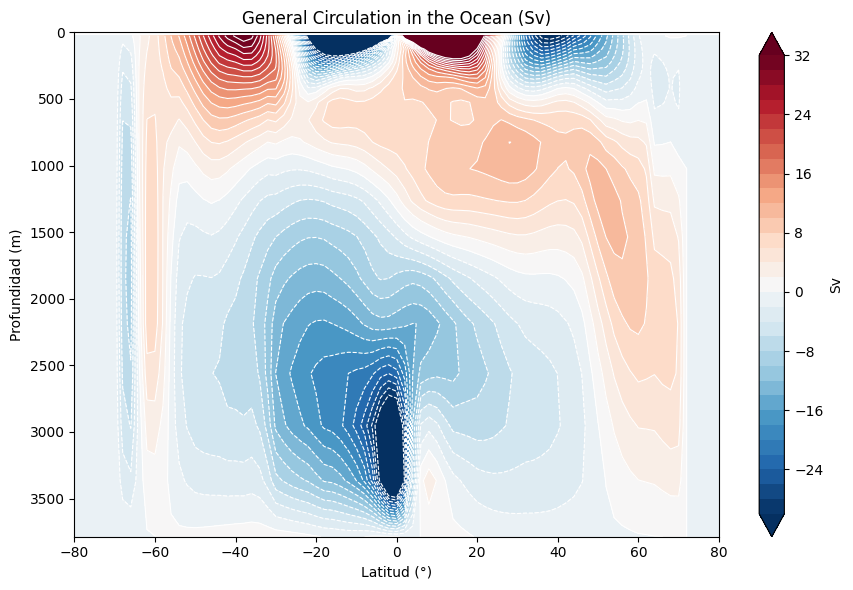

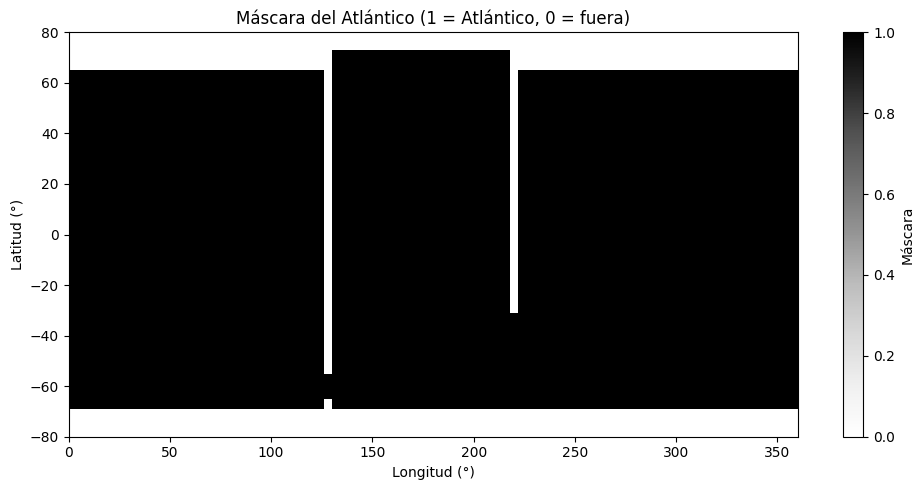

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os


ruta_base = "/home/laura/Tesis"

flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))

ty_trans = flux_ds["ty_trans"].isel(time=0)
ty_trans_gm = flux_ds["ty_trans_gm"].isel(time=0)

xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]

lon_mask = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))

lat_mask = (yu >= -68) & (yu <= -31)

lon_maskA = ((xt >= 130) & (xt <= 217)) 

lat_maskA = (yu >= -30) & (yu <= 72)

lon_maskP = ((xt >= 0) & (xt <= 125)) | ((xt >= 223) & (xt <= 360))

lat_maskP = (yu >= -30) & (yu <= 64)

sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -66 ) & (yu < -54)


mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0) + xr.where(sqr_mask_x, 1.0, 0.0) * xr.where(sqr_mask_y, 1.0, 0.0) + xr.where(lat_maskA, 1.0, 0.0) * xr.where(lon_maskA, 1.0, 0.0) + xr.where(lat_maskP, 1.0, 0.0) * xr.where(lon_maskP, 1.0, 0.0)

mask = xr.zeros_like(ty_trans)
for k in range(mask.sizes["st_ocean"]):
    mask[k, :, :] = mask_2d

ty_trans_masked = ty_trans * mask
ty_trans_gm_masked = ty_trans_gm * mask


total_ty = ty_trans_masked

total_ty_zonal = total_ty.sum(dim="xt_ocean")

amoc = total_ty_zonal.cumsum(dim="st_ocean")


plt.figure(figsize=(9, 6))
levels = np.arange(-30, 34, 2)

cf = plt.contourf(yu, st, amoc, levels=levels, cmap="RdBu_r", extend="both")

plt.contour(yu, st, amoc, levels=levels, colors='white', linewidths=0.8)

max_idx = np.unravel_index(np.nanargmax(amoc.values), amoc.shape)
plt.contour(yu, st, amoc, levels=[amoc.values[max_idx]], colors='k', linewidths=1.5)

plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 3501, 500))
plt.xlim(-80, 80)
plt.xlabel("Latitud (°)")
plt.ylabel("Profundidad (m)")
plt.title("General Circulation in the Ocean (Sv)")
cbar = plt.colorbar(cf)
cbar.set_label("Sv")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.pcolormesh(xt, yu, mask.isel(st_ocean=0), cmap="Greys", shading="auto")

plt.title("Máscara del Atlántico (1 = Atlántico, 0 = fuera)")
plt.xlabel("Longitud (°)")
plt.ylabel("Latitud (°)")
plt.colorbar(label="Máscara")
plt.xlim(0, 360)
plt.ylim(-80, 80)
plt.tight_layout()
plt.show()


/tmp/ipykernel_13932/1622749259.py:10: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(ruta_nc)
/tmp/ipykernel_13932/1622749259.py:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(ruta_nc)


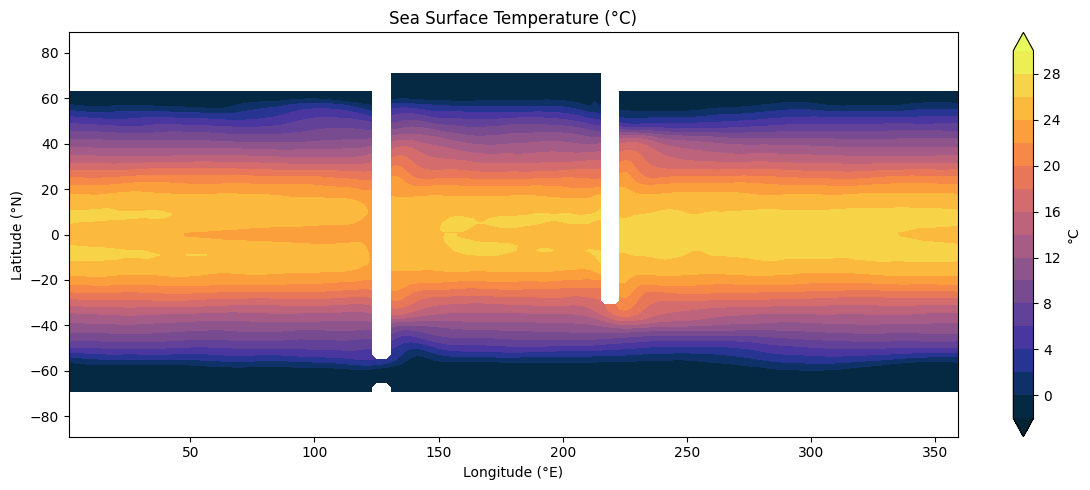

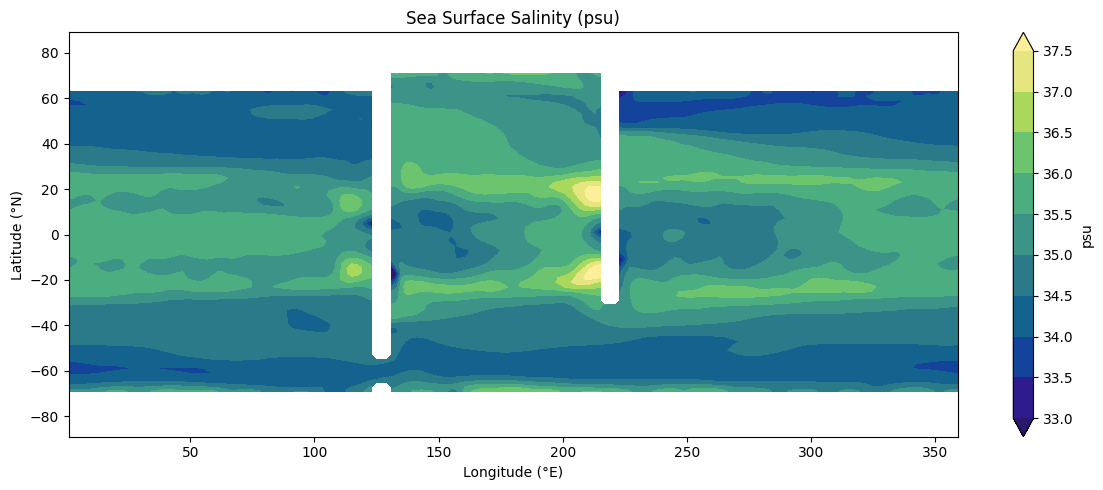

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean


ruta_nc = "/home/laura/Tesis/merged_sst_sss.nc"


ds = xr.open_dataset(ruta_nc)

sst = ds["SST"].isel(time=0)
sss = ds["SSS"].isel(time=0)
lon = ds["xt"]
lat = ds["yt"]


sst_levels = np.arange(-2, 32, 2)  
sss_levels = np.arange(33, 38, 0.5)  
# SST
plt.figure(figsize=(12, 5))
cs1 = plt.contourf(
    lon, lat, sst,
    levels=sst_levels,
    cmap=cmocean.cm.thermal,
    extend="both"
)
plt.colorbar(cs1, label="°C")
plt.title("Sea Surface Temperature (°C)")
plt.xlabel("Longitude (°E)")
plt.ylabel("Latitude (°N)")
plt.tight_layout()
plt.show()

# SSS
plt.figure(figsize=(12, 5))
cs2 = plt.contourf(
    lon, lat, sss,
    levels=sss_levels,
    cmap=cmocean.cm.haline,
    extend="both"
)
plt.colorbar(cs2, label="psu")
plt.title("Sea Surface Salinity (psu)")
plt.xlabel("Longitude (°E)")
plt.ylabel("Latitude (°N)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_4580/441950700.py:9: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_flux.nc"))
/tmp/ipykernel_4580/441950700.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_flux.nc"))


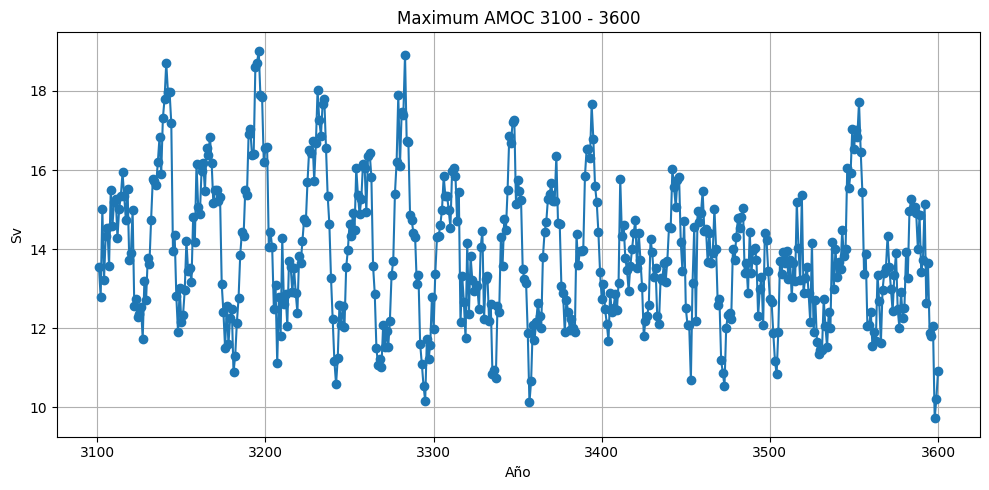

In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

ruta_base = "/home/laura/Tesis"


flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_flux.nc"))


ty_trans = flux_ds["ty_trans"]
ty_trans_gm = flux_ds["ty_trans_gm"]

xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]
time = flux_ds["time"]


lon_mask = ((xt >= 130) & (xt <= 217))
lat_mask = (yu >= -30) & (yu <= 72)
mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0)

mask = xr.zeros_like(ty_trans.isel(time=0))
for k in range(mask.sizes["st_ocean"]):
    mask[k, :, :] = mask_2d


ty_trans_masked = ty_trans * mask
ty_trans_gm_masked = ty_trans_gm * mask


total_ty_zonal = ty_trans_masked.sum(dim="xt_ocean")
total_ty_gm = ty_trans_gm_masked.sum(dim="xt_ocean")


amoc = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_gm

lat_sel = (yu >= 34) & (yu <= 45)
depth_sel = (st >= 500) & (st <= 1000)


amoc_sel = amoc.sel(yu_ocean=lat_sel, st_ocean=depth_sel)


time_sel = flux_ds["time"].dt.year > 2910

amoc_sel_time = amoc_sel.sel(time=time_sel)


years_sel = flux_ds["time"].sel(time=time_sel).dt.year.values

amoc_max_series = amoc_sel_time.max(dim=["st_ocean", "yu_ocean"]).values

# Graficar timeseries
plt.figure(figsize=(10, 5))
plt.plot(years_sel, amoc_max_series, marker='o')
plt.title("Maximum AMOC 3100 - 3600")
plt.xlabel("Año")
plt.ylabel("Sv")
plt.grid(True)
plt.tight_layout()
plt.show()



/tmp/ipykernel_4580/2505016135.py:9: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(os.path.join(ruta_base, "merged_ocean_diags.nc"))
/tmp/ipykernel_4580/2505016135.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(os.path.join(ruta_base, "merged_ocean_diags.nc"))
/tmp/ipykernel_4580/2505016135.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  nz = ds.dims["st_ocean"]
/tmp/ipykerne

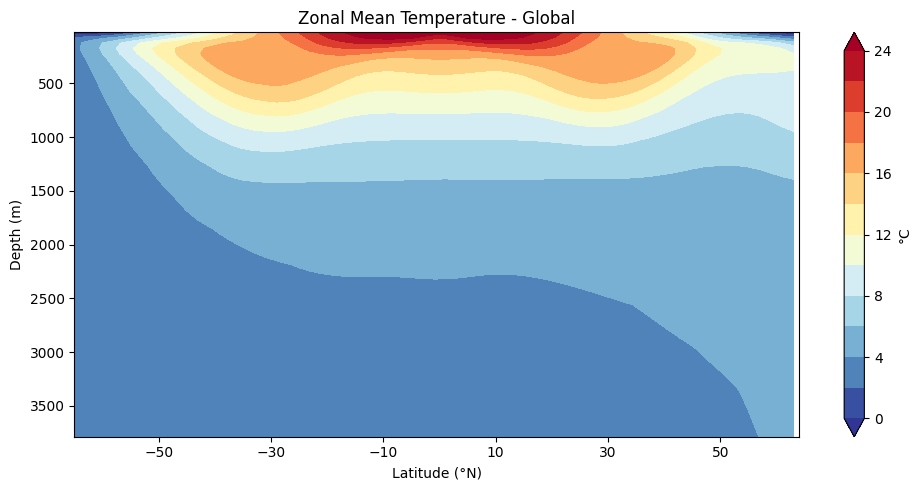

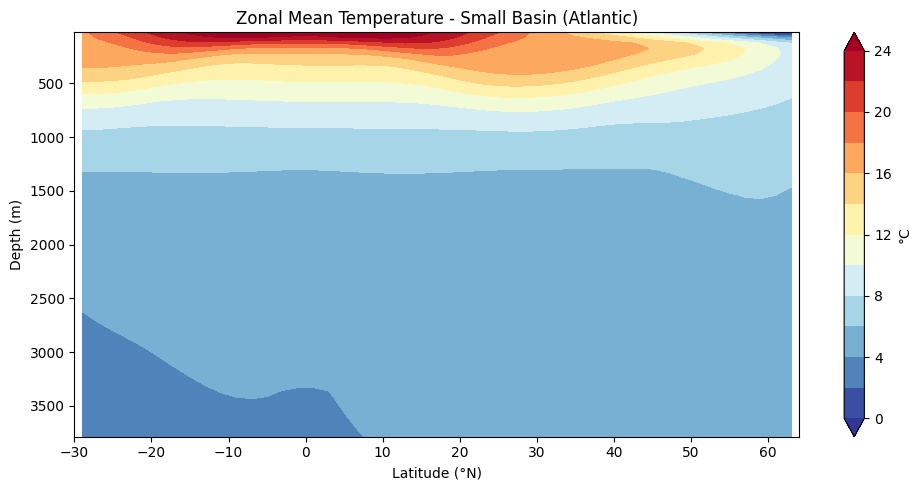

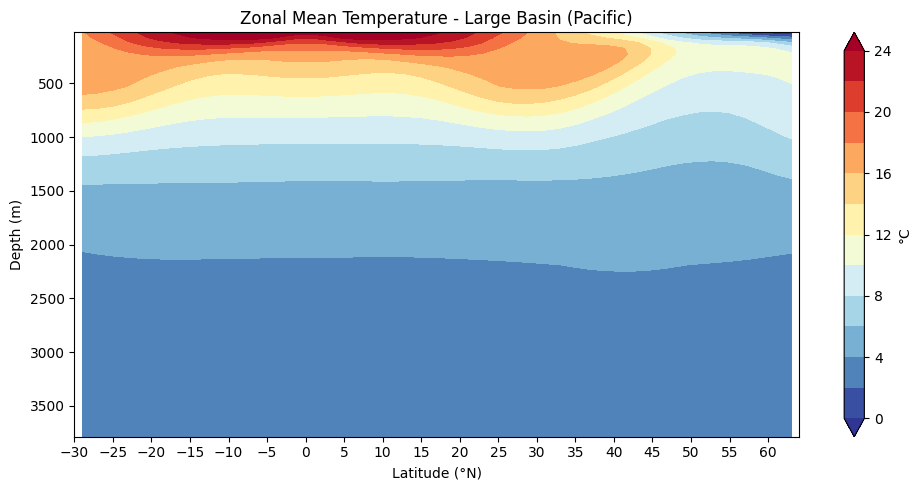

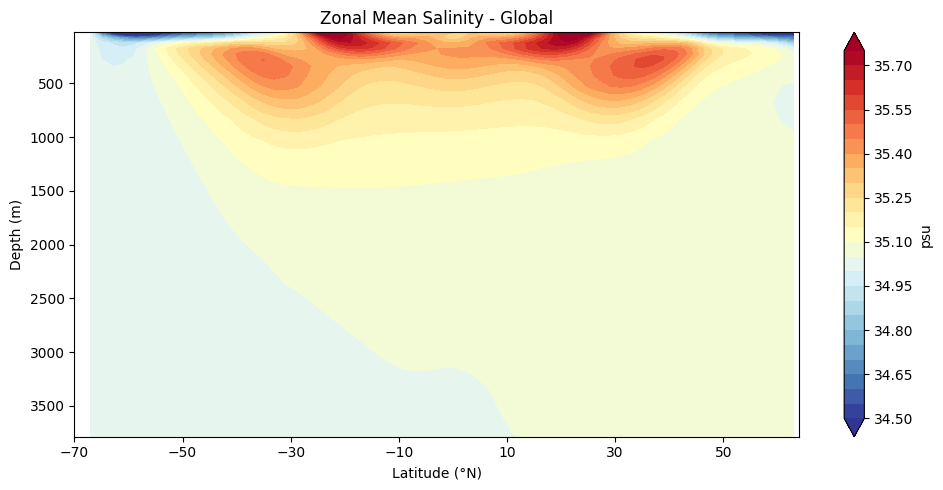

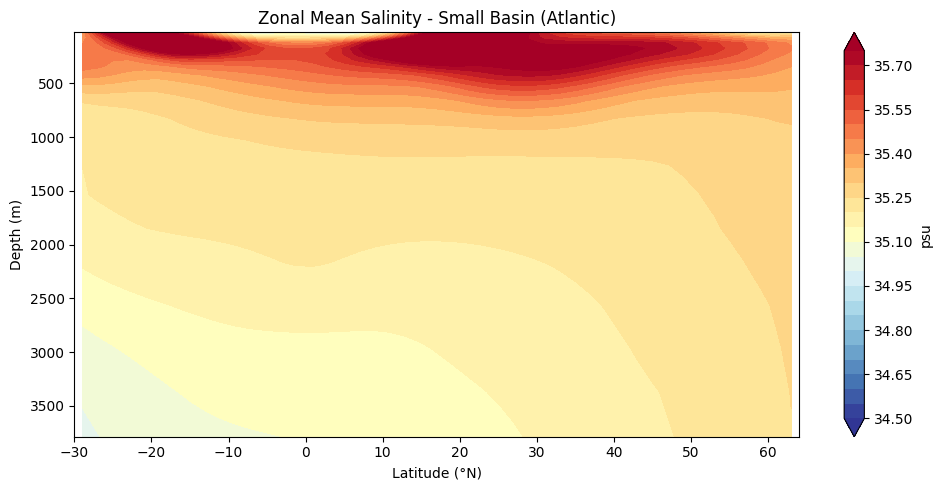

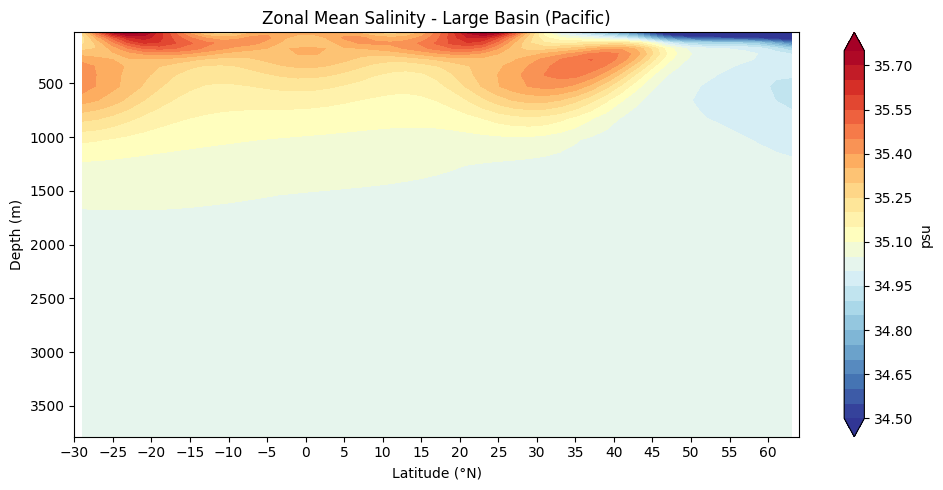

In [27]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import os

# Ruta del archivo
ruta_base = "/home/laura/Tesis"
ds = xr.open_dataset(os.path.join(ruta_base, "merged_ocean_diags.nc"))

# Promedio temporal
temp = ds["temp"].mean("time")
salt = ds["salt"].mean("time")

# Coordenadas
xt = ds["xt_ocean"]
yu = ds["yt_ocean"]
zt = ds["st_ocean"]

# Dimensiones
nz = ds.dims["st_ocean"]
ny = ds.dims["yt_ocean"]
nx = ds.dims["xt_ocean"]

# Límite común en latitud para evitar artefactos
lat_min_global = -68
lat_max_common = 64

# Máscaras corregidas
lat_mask   = ((yu >= lat_min_global) & (yu <= -31)).broadcast_like(temp)
lon_mask   = (((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))).broadcast_like(temp)

lat_maskA  = ((yu >= -30) & (yu <= lat_max_common)).broadcast_like(temp)
lon_maskA  = ((xt >= 130) & (xt <= 217)).broadcast_like(temp)

lat_maskP  = ((yu >= -30) & (yu <= lat_max_common)).broadcast_like(temp)
lon_maskP  = (((xt >= 0) & (xt <= 125)) | ((xt >= 223) & (xt <= 360))).broadcast_like(temp)

sqr_mask_x = ((xt > 125) & (xt < 131)).broadcast_like(temp)
sqr_mask_y = ((yu > -66) & (yu < -54)).broadcast_like(temp)

# Máscara global combinada
mask_global = (
    lat_mask * lon_mask +
    sqr_mask_y * sqr_mask_x +
    lat_maskA * lon_maskA +
    lat_maskP * lon_maskP
)

# Máscaras individuales
mask_small = lat_maskA * lon_maskA
mask_large = lat_maskP * lon_maskP

# Función para promedio zonal
def zonal_mean(var, mask):
    var_masked = var.where(mask)
    mean_lon = var_masked.mean(dim="xt_ocean")
    return mean_lon

# Temperatura y salinidad promediadas
temp_global = zonal_mean(temp, mask_global)
temp_small  = zonal_mean(temp, mask_small)
temp_large  = zonal_mean(temp, mask_large)

salt_global = zonal_mean(salt, mask_global)
salt_small  = zonal_mean(salt, mask_small)
salt_large  = zonal_mean(salt, mask_large)

# Función de graficación
def plot_section(data, title, cmap, levels, var_label, lat_ticks=None, lat_limits=None):
    plt.figure(figsize=(10, 5))
    
    lat = data["yt_ocean"]
    depth = data["st_ocean"]
    Z = data.values

    cs = plt.contourf(lat, depth, Z, levels=levels, cmap=cmap, extend="both")
    plt.gca().invert_yaxis()
    plt.colorbar(cs, label=var_label)
    plt.xlabel("Latitude (°N)")
    plt.ylabel("Depth (m)")
    plt.title(title)

    if lat_ticks is not None:
        plt.xticks(lat_ticks)

    if lat_limits is not None:
        plt.xlim(lat_limits)
    
    plt.tight_layout()
    plt.show()

# Temperatura
plot_section(temp_global, "Zonal Mean Temperature - Global", "RdYlBu_r", np.arange(0, 25, 2), "°C",
             lat_ticks=np.arange(-70, 81, 20), lat_limits=(-65, 64))

plot_section(temp_small, "Zonal Mean Temperature - Small Basin (Atlantic)", "RdYlBu_r", np.arange(0, 25, 2), "°C",
             lat_ticks=np.arange(-30, 81, 10), lat_limits=(-30, 64))

plot_section(temp_large, "Zonal Mean Temperature - Large Basin (Pacific)", "RdYlBu_r", np.arange(0, 25, 2), "°C",
             lat_ticks=np.arange(-30, 66, 5), lat_limits=(-30, 64))

# Salinidad
salinity_levels = np.arange(34.5, 35.8, 0.05)

plot_section(salt_global, "Zonal Mean Salinity - Global", "RdYlBu_r", salinity_levels, "psu",
             lat_ticks=np.arange(-70, 81, 20), lat_limits=(-70, 64))

plot_section(salt_small, "Zonal Mean Salinity - Small Basin (Atlantic)", "RdYlBu_r", salinity_levels, "psu",
             lat_ticks=np.arange(-30, 81, 10), lat_limits=(-30, 64))

plot_section(salt_large, "Zonal Mean Salinity - Large Basin (Pacific)", "RdYlBu_r", salinity_levels, "psu",
             lat_ticks=np.arange(-30, 66, 5), lat_limits=(-30, 64))


/tmp/ipykernel_5861/2270273380.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "tm_flux.nc"))
/tmp/ipykernel_5861/2270273380.py:8: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "tm_flux.nc"))


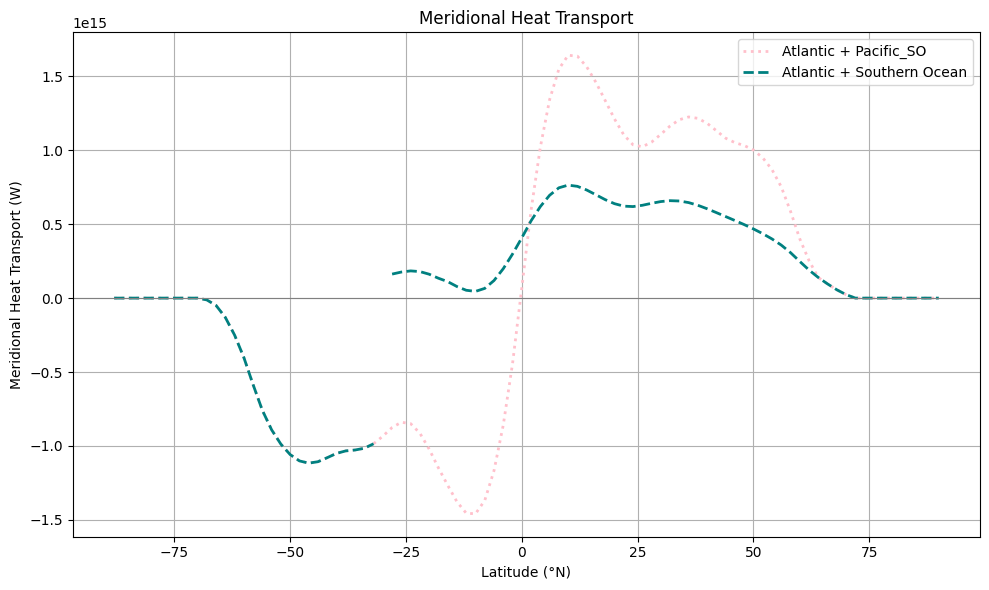

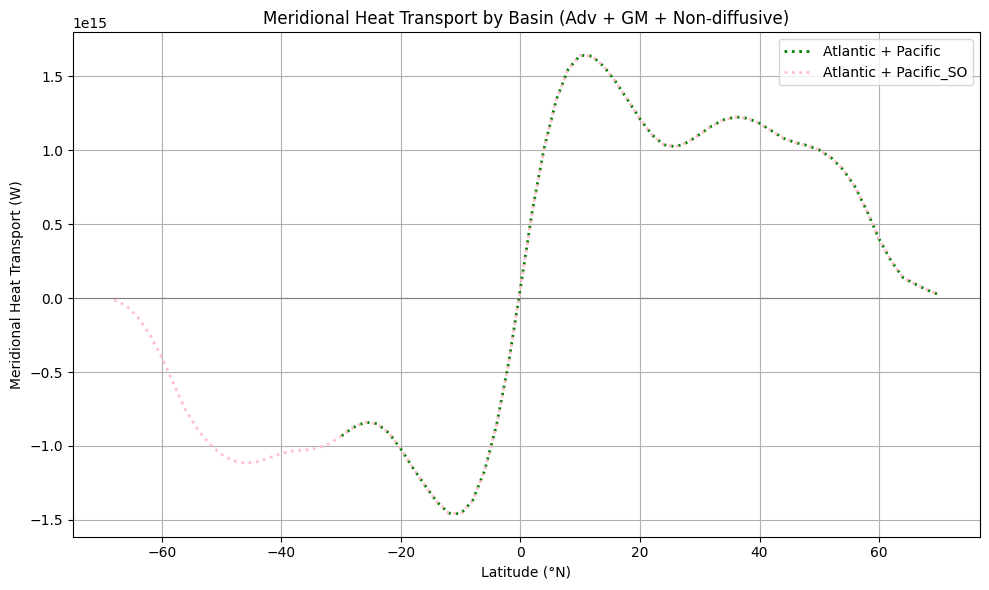

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

# === Carga de datos ===
ruta_base = "/home/laura/Tesis"
flux_ds = xr.open_dataset(os.path.join(ruta_base, "tm_flux.nc"))

temp_yflux_adv      = flux_ds["temp_yflux_adv_int_z"].isel(time=0)
temp_yflux_gm       = flux_ds["temp_yflux_gm_int_z"].isel(time=0)
temp_yflux_ndiffuse = flux_ds["temp_yflux_ndiffuse_int_z"].isel(time=0)

xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]

# === Máscaras ===
mask_global = xr.ones_like(temp_yflux_adv)

# Atlantic
lon_mask_A = (xt >= 130) & (xt <= 217)
lat_mask_A = (yu >= -30) & (yu <= 80)
mask_A = xr.where(lat_mask_A, 1.0, 0.0) * xr.where(lon_mask_A, 1.0, 0.0)

# Atlantic auxiliar (para restar en SO+P)
lon_mask_A1 = (xt >= 125) & (xt <= 224)
lat_mask_A1 = (yu >= -30) & (yu <= 80)
mask_A1 = xr.where(lat_mask_A, 1.0, 0.0) * xr.where(lon_mask_A, 1.0, 0.0)

# Pacific
lon_mask_P = ((xt >= 0) & (xt <= 125)) | ((xt >= 218) & (xt <= 360))
lat_mask_P = (yu >= -30) & (yu <= 65)
mask_P = xr.where(lat_mask_P, 1.0, 0.0) * xr.where(lon_mask_P, 1.0, 0.0)

# Pacific Auxiliar
lon_mask_P1 = ((xt >= 0) & (xt <= 125)) | ((xt >= 223) & (xt <= 360))
lat_mask_P1 = (yu >= -30) & (yu <= 65)
mask_P1 = xr.where(lat_mask_P, 1.0, 0.0) * xr.where(lon_mask_P, 1.0, 0.0)

# Pacific + Southern Ocean
lon_mask_SO_P = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))
lat_mask_SO_P_full = (yu >= -68) & (yu <= 65)
sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -68) & (yu < -31)
sqr_mask_x1 = (xt > 125) & (xt < 131)
sqr_mask_y1 = (yu > -55) & (yu < -31)

mask_SO_P_base = xr.where(lat_mask_SO_P_full, 1.0, 0.0) * xr.where(lon_mask_SO_P, 1.0, 0.0) + \
                 xr.where(sqr_mask_y, 1.0, 0.0) * xr.where(sqr_mask_x, 1.0, 0.0) - \
                 xr.where(sqr_mask_y1, 1.0, 0.0) * xr.where(sqr_mask_x1, 1.0, 0.0)

mask_2d_SO_P_corr = mask_SO_P_base - mask_A1
mask_2d_SO_P_corr = xr.where(mask_2d_SO_P_corr < 0, 0.0, mask_2d_SO_P_corr)

# Atlantic + Southern Ocean
mask_Atl_SO = mask_A + mask_2d_SO_P_corr - mask_P1
mask_Atl_SO = xr.where(mask_Atl_SO > 1.0, 1.0, mask_Atl_SO)

# === Función para calcular transporte ===
def calcular_transporte(mask):
    adv_masked      = temp_yflux_adv      * mask
    gm_masked       = temp_yflux_gm       * mask
    ndiffuse_masked = temp_yflux_ndiffuse * mask
    adv_trans      = adv_masked.sum(dim="xt_ocean")
    gm_trans       = gm_masked.sum(dim="xt_ocean")
    ndiffuse_trans = ndiffuse_masked.sum(dim="xt_ocean")
    return adv_trans + gm_trans + ndiffuse_trans

# === Cálculos ===
transporte_global     = calcular_transporte(mask_global)
transporte_A          = calcular_transporte(mask_A)
transporte_P          = calcular_transporte(mask_P)
transporte_SO_P       = calcular_transporte(mask_2d_SO_P_corr)
transporte_Atl_SO     = calcular_transporte(mask_Atl_SO)

transporte_suma_AP    = transporte_A + transporte_P
transporte_suma_POA   = transporte_SO_P + transporte_A

import numpy as np

# Copiar los datos originales
transporte_Atl_SO_plot = transporte_Atl_SO.copy()

# Buscar el índice de -30° (o el más cercano)
idx_30S = np.abs(yu.values - (-30)).argmin()

# Insertar un NaN en ese punto
transporte_Atl_SO_plot.values[idx_30S] = np.nan

# Graficar
plt.figure(figsize=(10,6))
#plt.plot(yu, transporte_suma_AP, label="Atlantic + Pacific", color='green', linestyle=':', linewidth=2)
plt.plot(yu, transporte_suma_POA, label="Atlantic + Pacific_SO", color='pink', linestyle=':', linewidth=2)
plt.plot(yu, transporte_Atl_SO_plot, label="Atlantic + Southern Ocean", color='teal', linestyle='--', linewidth=2)
plt.axhline(0, color='gray', linewidth=0.8)
plt.xlabel("Latitude (°N)")
plt.ylabel("Meridional Heat Transport (W)")
plt.title("Meridional Heat Transport")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# # === Gráfico de máscaras ===
# fig, axs = plt.subplots(3, 2, figsize=(14,12), constrained_layout=True)

# axs[0,0].pcolormesh(xt, yu, mask_global, cmap="Blues")
# axs[0,0].set_title("Global Mask")
# axs[0,0].set_xlabel("Longitude")
# axs[0,0].set_ylabel("Latitude")

# axs[0,1].pcolormesh(xt, yu, mask_A, cmap="Oranges")
# axs[0,1].set_title("Atlantic Mask")
# axs[0,1].set_xlabel("Longitude")
# axs[0,1].set_ylabel("Latitude")

# axs[1,0].pcolormesh(xt, yu, mask_P, cmap="Greens")
# axs[1,0].set_title("Pacific Mask")
# axs[1,0].set_xlabel("Longitude")
# axs[1,0].set_ylabel("Latitude")

# axs[1,1].pcolormesh(xt, yu, mask_2d_SO_P_corr, cmap="Reds")
# axs[1,1].set_title("Pacific + Southern Ocean Mask (Final)")
# axs[1,1].set_xlabel("Longitude")
# axs[1,1].set_ylabel("Latitude")

# axs[2,0].pcolormesh(xt, yu, mask_Atl_SO, cmap="Purples")
# axs[2,0].set_title("Atlantic + Southern Ocean Mask")
# axs[2,0].set_xlabel("Longitude")
# axs[2,0].set_ylabel("Latitude")

# plt.show()

# === Gráfico de transporte ===
plt.figure(figsize=(10,6))
#plt.plot(yu, transporte_global, label="Global", color='black', linestyle='--', linewidth=1.8)
#plt.plot(yu, transporte_A.where(transporte_A != 0), label="Atlantic", color='royalblue')
#plt.plot(yu, transporte_P.where(transporte_P != 0), label="Pacific", color='darkorange')
#plt.plot(yu, transporte_SO_P, label="Pacific + Southern Ocean", color='firebrick')
plt.plot(yu, transporte_suma_AP.where(transporte_suma_AP != 0), label="Atlantic + Pacific", color='green', linestyle=':', linewidth=2)
plt.plot(yu, transporte_suma_POA.where(transporte_suma_POA != 0), label="Atlantic + Pacific_SO", color='pink', linestyle=':', linewidth=2)
#plt.plot(yu, transporte_Atl_SO.where(transporte_Atl_SO != 0), label="Atlantic + Southern Ocean", color='teal', linestyle='--', linewidth=2)

plt.axhline(0, color='gray', linewidth=0.8)
plt.xlabel("Latitude (°N)")
plt.ylabel("Meridional Heat Transport (W)")
plt.title("Meridional Heat Transport by Basin (Adv + GM + Non-diffusive)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_5861/2039280726.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))
/tmp/ipykernel_5861/2039280726.py:8: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))


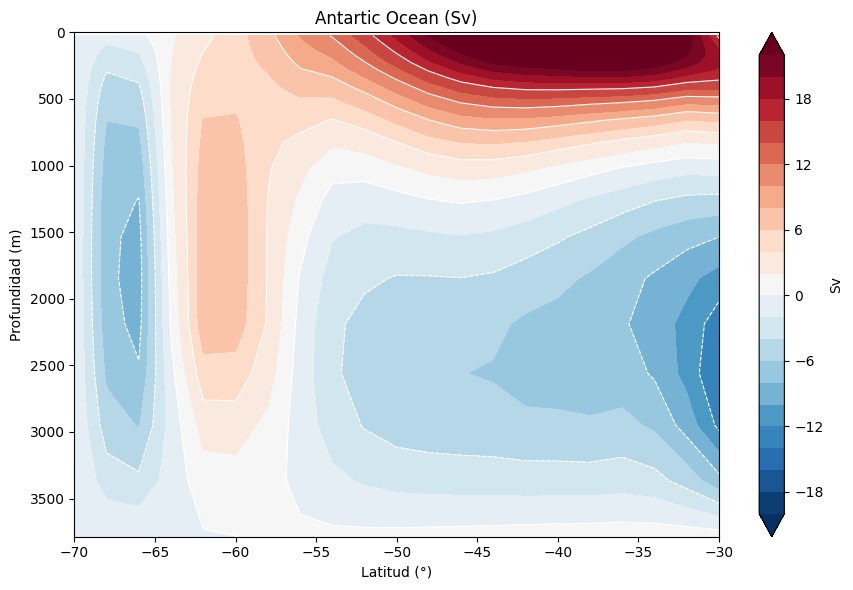

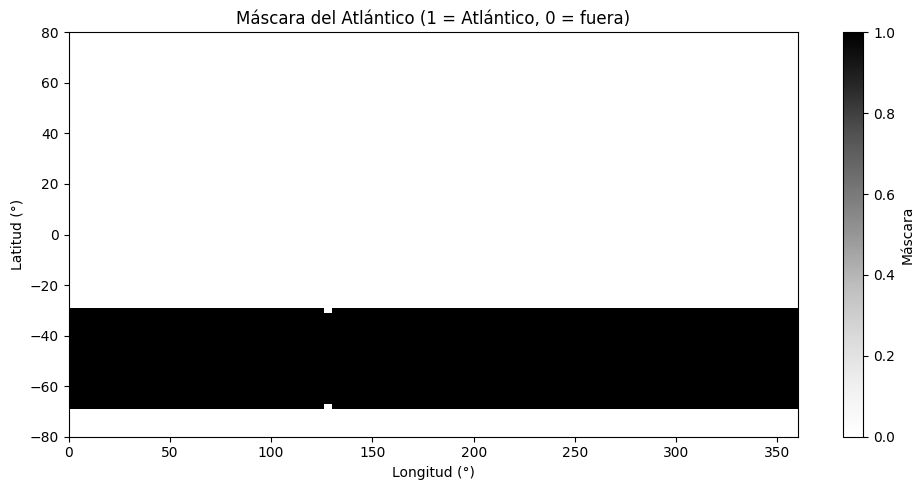

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

ruta_base = "/home/laura/Tesis"

flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))

ty_trans = flux_ds["ty_trans"].isel(time=0)
ty_trans_gm = flux_ds["ty_trans_gm"].isel(time=0)

xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]


lon_mask = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))
lat_mask = (yu >= -68) & (yu <= -30)

sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -68 ) & (yu < -31)

mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0) + xr.where(sqr_mask_x, 1.0, 0.0) * xr.where(sqr_mask_y, 1.0, 0.0) 


mask = xr.zeros_like(ty_trans)
for k in range(mask.sizes["st_ocean"]):
    mask[k, :, :] = mask_2d

ty_trans_masked = ty_trans * mask
ty_trans_gm_masked = ty_trans_gm * mask


total_ty = ty_trans_masked

total_ty_zonal = total_ty.sum(dim="xt_ocean")
total_ty_gm = ty_trans_gm_masked.sum(dim="xt_ocean")


amoc_total = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_gm

plt.figure(figsize=(9, 6))
levels = np.arange(-20, 24, 2)

cf = plt.contourf(yu, st, amoc, levels=levels, cmap="RdBu_r", extend="both")

contour_levels = np.arange(-16, 20, 4)
plt.contour(yu, st, amoc, levels=contour_levels, colors='white', linewidths=0.8)

max_idx = np.unravel_index(np.nanargmax(amoc.values), amoc.shape)
plt.contour(yu, st, amoc, levels=[amoc.values[max_idx]], colors='k', linewidths=1.5)

plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 3501, 500))
plt.xlim(-70, -30)
plt.xlabel("Latitud (°)")
plt.ylabel("Profundidad (m)")
plt.title("Antartic Ocean (Sv)")
cbar = plt.colorbar(cf)
cbar.set_label("Sv")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.pcolormesh(xt, yu, mask.isel(st_ocean=0), cmap="Greys", shading="auto")

plt.title("Máscara del Atlántico (1 = Atlántico, 0 = fuera)")
plt.xlabel("Longitud (°)")
plt.ylabel("Latitud (°)")
plt.colorbar(label="Máscara")
plt.xlim(0, 360)
plt.ylim(-80, 80)
plt.tight_layout()
plt.show()


/tmp/ipykernel_5846/3533371158.py:9: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_flux.nc"))
/tmp/ipykernel_5846/3533371158.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_flux.nc"))


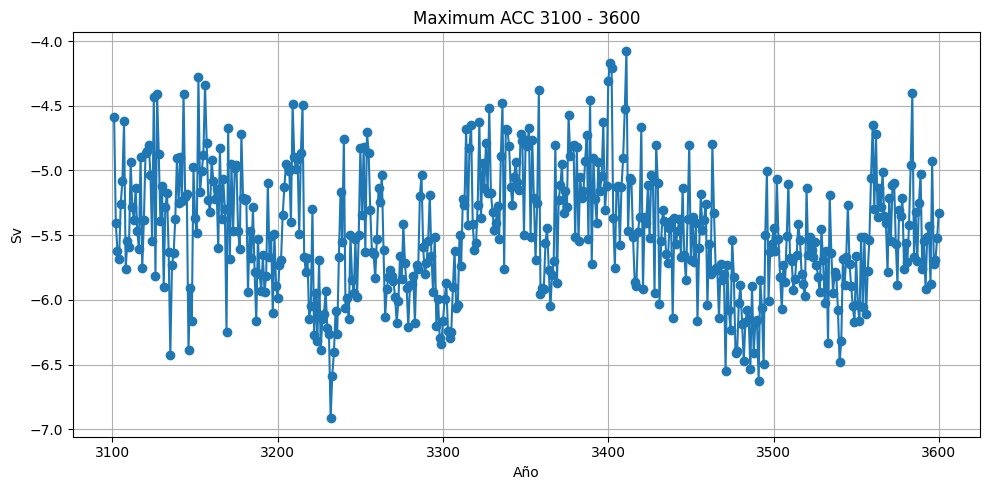

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

ruta_base = "/home/laura/Tesis"


flux_ds = xr.open_dataset(os.path.join(ruta_base, "merged_flux.nc"))


ty_trans = flux_ds["ty_trans"]
ty_trans_gm = flux_ds["ty_trans_gm"]

xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]
time = flux_ds["time"]


# lon_mask = ((xt >= 130) & (xt <= 217))
# lat_mask = (yu >= -30) & (yu <= 72)
# mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0)

lon_mask = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))
lat_mask = (yu >= -68) & (yu <= -30)

sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -68 ) & (yu < -31)

mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0) + xr.where(sqr_mask_x, 1.0, 0.0) * xr.where(sqr_mask_y, 1.0, 0.0) 


mask = xr.zeros_like(ty_trans.isel(time=0))
for k in range(mask.sizes["st_ocean"]):
    mask[k, :, :] = mask_2d


ty_trans_masked = ty_trans * mask
ty_trans_gm_masked = ty_trans_gm * mask


total_ty_zonal = ty_trans_masked.sum(dim="xt_ocean")
total_ty_gm = ty_trans_gm_masked.sum(dim="xt_ocean")


amoc = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_gm

lat_sel = (yu >= -55) & (yu <= -30)
depth_sel = (st >= 2000) & (st <= 3500)


amoc_sel = amoc.sel(yu_ocean=lat_sel, st_ocean=depth_sel)


time_sel = flux_ds["time"].dt.year > 2910

amoc_sel_time = amoc_sel.sel(time=time_sel)


years_sel = flux_ds["time"].sel(time=time_sel).dt.year.values

amoc_max_series = amoc_sel_time.max(dim=["st_ocean", "yu_ocean"]).values

# Graficar timeseries
plt.figure(figsize=(10, 5))
plt.plot(years_sel, amoc_max_series, marker='o')
plt.title("Maximum ACC 3100 - 3600")
plt.xlabel("Año")
plt.ylabel("Sv")
plt.grid(True)
plt.tight_layout()
plt.show()



/tmp/ipykernel_5861/2041313118.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "29010101.ocean_flux.nc"))
/tmp/ipykernel_5861/2041313118.py:8: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "29010101.ocean_flux.nc"))


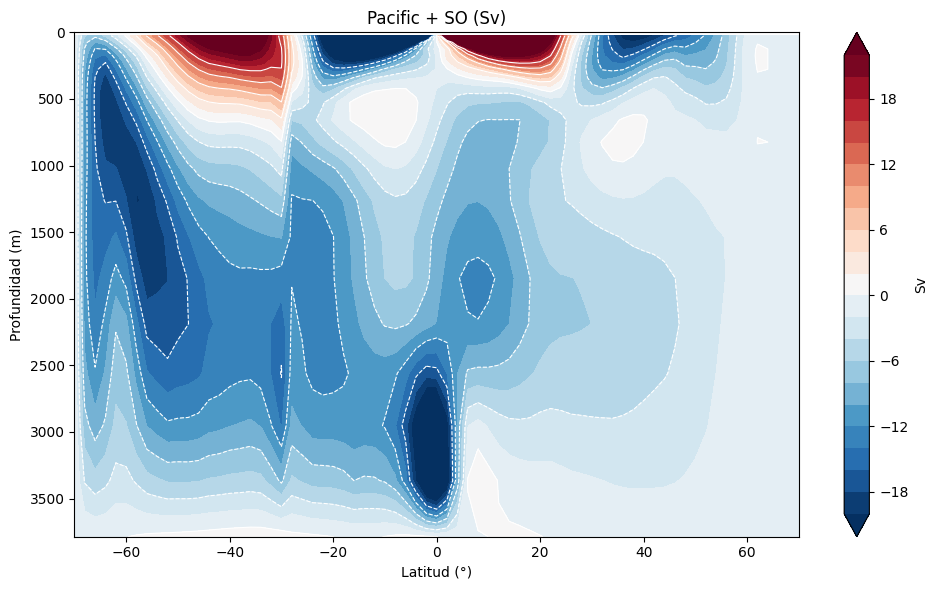

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

# === Abrir datos ===
ruta_base = "/home/laura/Tesis"
flux_ds = xr.open_dataset(os.path.join(ruta_base, "29010101.ocean_flux.nc"))

ty_trans = flux_ds["ty_trans"].isel(time=0)
ty_trans_gm = flux_ds["ty_trans_gm"].isel(time=0)
xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]

# === Máscara del Océano Austral ===
lon_mask_so = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))
lat_mask_so = (yu >= -68) & (yu <= -30)
sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -68 ) & (yu < -31)

mask_2d_so = (
    xr.where(lat_mask_so, 1.0, 0.0) * xr.where(lon_mask_so, 1.0, 0.0) +
    xr.where(sqr_mask_x, 1.0, 0.0) * xr.where(sqr_mask_y, 1.0, 0.0)
)

# === Máscara del Pacífico ===
lon_mask_pac = ((xt >= 0) & (xt <= 121)) | ((xt >= 223) & (xt <= 360))
lat_mask_pac = (yu >= -30) & (yu <= 64)

mask_2d_pac = xr.where(lat_mask_pac, 1.0, 0.0) * xr.where(lon_mask_pac, 1.0, 0.0)

# === Máscara combinada ===
mask_2d_total = xr.where(mask_2d_so + mask_2d_pac > 0, 1.0, 0.0)

# Expandir máscara a 3D
mask_3d = xr.zeros_like(ty_trans)
for k in range(mask_3d.sizes["st_ocean"]):
    mask_3d[k, :, :] = mask_2d_total

# === Aplicar máscara y calcular la circulación integrada ===
total_ty_masked = ty_trans * mask_3d
total_ty_masked_gm = ty_trans_gm * mask_3d
total_ty_zonal = total_ty_masked.sum(dim="xt_ocean")
total_ty_zonal_gm = total_ty_masked_gm.sum(dim="xt_ocean")
amoc_total = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_zonal_gm

# === Gráfica ===
plt.figure(figsize=(10, 6))
levels = np.arange(-20, 24, 2)

cf = plt.contourf(yu, st, amoc_total, levels=levels, cmap="RdBu_r", extend="both")
plt.contour(yu, st, amoc_total, levels=np.arange(-16, 20, 4), colors='white', linewidths=0.8)

# Contorno negro del máximo
max_idx = np.unravel_index(np.nanargmax(amoc_total.values), amoc_total.shape)
plt.contour(yu, st, amoc_total, levels=[amoc_total.values[max_idx]], colors='k', linewidths=1.5)

plt.gca().invert_yaxis()
plt.xlabel("Latitud (°)")
plt.ylabel("Profundidad (m)")
plt.title("Pacific + SO (Sv)")
plt.yticks(np.arange(0, 3501, 500))
plt.xlim(-70, 70)

cbar = plt.colorbar(cf)
cbar.set_label("Sv")
plt.tight_layout()
plt.show()


/tmp/ipykernel_5861/4142988131.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "29010101.ocean_flux.nc"))
/tmp/ipykernel_5861/4142988131.py:8: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "29010101.ocean_flux.nc"))


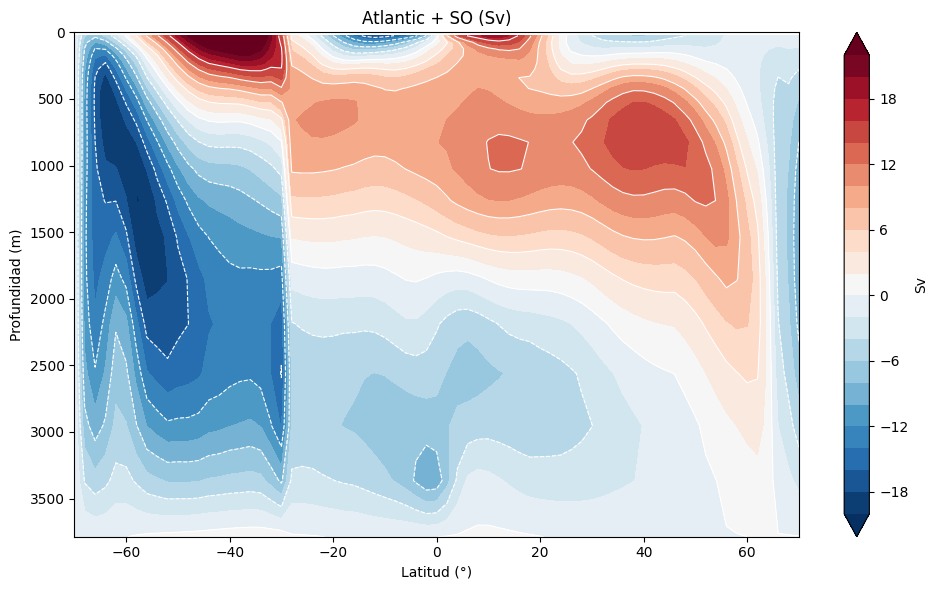

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

# === Abrir datos ===
ruta_base = "/home/laura/Tesis"
flux_ds = xr.open_dataset(os.path.join(ruta_base, "29010101.ocean_flux.nc"))

ty_trans = flux_ds["ty_trans"].isel(time=0)
ty_trans_gm = flux_ds["ty_trans_gm"].isel(time=0)
xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]

# === Máscara del Océano Austral ===
lon_mask_so = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))
lat_mask_so = (yu >= -68) & (yu <= -30)
sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -68 ) & (yu < -31)

mask_2d_so = (
    xr.where(lat_mask_so, 1.0, 0.0) * xr.where(lon_mask_so, 1.0, 0.0) +
    xr.where(sqr_mask_x, 1.0, 0.0) * xr.where(sqr_mask_y, 1.0, 0.0)
)

# === Máscara del Atlántico ===
lon_mask_atl = (xt >= 130) & (xt <= 217)
lat_mask_atl = (yu >= -30) & (yu <= 72)

mask_2d_atl = xr.where(lat_mask_atl, 1.0, 0.0) * xr.where(lon_mask_atl, 1.0, 0.0)

# === Máscara combinada: SO + Atlántico ===
mask_2d_total = xr.where(mask_2d_so + mask_2d_atl > 0, 1.0, 0.0)

# Expandir a 3D
mask_3d = xr.zeros_like(ty_trans)
for k in range(mask_3d.sizes["st_ocean"]):
    mask_3d[k, :, :] = mask_2d_total

# === Aplicar máscara y calcular circulación zonal integrada ===
total_ty_masked = ty_trans * mask_3d
total_ty_masked_gm = ty_trans_gm * mask_3d
total_ty_zonal = total_ty_masked.sum(dim="xt_ocean")
total_ty_zonal_gm = total_ty_masked_gm.sum(dim="xt_ocean")
amoc_total = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_zonal_gm
# === Graficar ===
plt.figure(figsize=(10, 6))
levels = np.arange(-20, 24, 2)

cf = plt.contourf(yu, st, amoc_total, levels=levels, cmap="RdBu_r", extend="both")
plt.contour(yu, st, amoc_total, levels=np.arange(-16, 20, 4), colors='white', linewidths=0.8)

# Contorno negro del máximo
max_idx = np.unravel_index(np.nanargmax(amoc_total.values), amoc_total.shape)
plt.contour(yu, st, amoc_total, levels=[amoc_total.values[max_idx]], colors='k', linewidths=1.5)

plt.gca().invert_yaxis()
plt.xlabel("Latitud (°)")
plt.ylabel("Profundidad (m)")
plt.title("Atlantic + SO (Sv)")
plt.yticks(np.arange(0, 3501, 500))
plt.xlim(-70, 70)

cbar = plt.colorbar(cf)
cbar.set_label("Sv")
plt.tight_layout()
plt.show()


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta del archivo
ruta_base = "/home/laura/Tesis"
flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))

# Definir coordenadas
xu = flux_ds["xu_ocean"]
yu = flux_ds["yt_ocean"]
st = flux_ds["st_ocean"]

# Definir máscara horizontal (longitud 126–130°E y latitud -67 a -55°S)
lon_mask = (xu >= 126) & (xu <= 130)
lat_mask = (yu >= -67) & (yu <= -55)
mask_2d = xr.where(lat_mask, 1.0, 0.0) * xr.where(lon_mask, 1.0, 0.0)

# Definir máscara 3D (st_ocean, yt_ocean, xu_ocean)
tx_trans = flux_ds["tx_trans"]
mask = xr.zeros_like(tx_trans.isel(time=0))
for k in range(mask.sizes["st_ocean"]):
    mask[k, :, :] = mask_2d

# Aplicar máscara sobre transporte en cada tiempo
tx_trans_masked = tx_trans * mask
tx_trans_gm_masked = flux_ds["tx_trans_gm"] * mask

# Integrar primero en latitud
total_tx_zonal = tx_trans_masked.sum(dim="yt_ocean")
total_tx_gm = tx_trans_gm_masked.sum(dim="yt_ocean")

# Integrar luego en vertical (entre 3100 y 3600 m)
depth_mask = (st >= 3100) & (st <= 3600)
total_tx_zonal_depth = total_tx_zonal.sel(st_ocean=depth_mask).sum(dim="st_ocean")
total_tx_gm_depth = total_tx_gm.sel(st_ocean=depth_mask).sum(dim="st_ocean")

# Transporte total zonal a lo largo del tiempo (integrado en lat, depth)
total_acc_transport = total_tx_zonal_depth + total_tx_gm_depth

# Filtrar años mayores a 2910
time_sel = flux_ds["time"].dt.year > 2910
years_sel = flux_ds["time"].sel(time=time_sel).dt.year.values

# Obtener máximo por año a lo largo de las longitudes seleccionadas
max_acc_series = total_acc_transport.sel(time=time_sel).max(dim="xu_ocean").values

# Graficar timeseries
plt.figure(figsize=(10, 5))
plt.plot(years_sel, max_acc_series, marker='o', color='navy')
plt.title("Máximo ACC (3100-3600 m, 126-130°E, -67 a -55°S)")
plt.xlabel("Año")
plt.ylabel("Transporte máximo (Sv)")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_23196/3145001199.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))
/tmp/ipykernel_23196/3145001199.py:8: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))


/tmp/ipykernel_13678/3655499660.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))
/tmp/ipykernel_13678/3655499660.py:8: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))


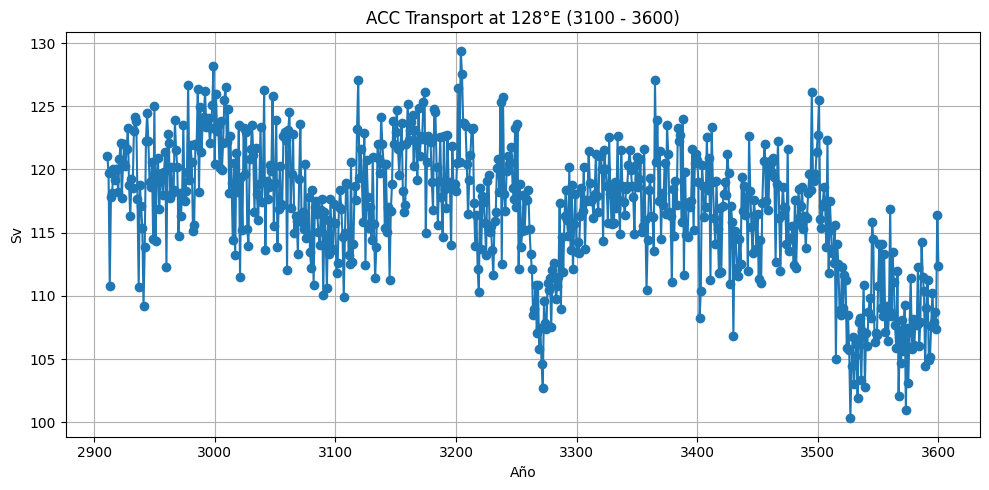

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os


ruta_base = "/home/laura/Tesis"
flux_ds = xr.open_dataset(os.path.join(ruta_base, "flux.nc"))


xu = flux_ds["xu_ocean"]
yu = flux_ds["yt_ocean"]


flux_x = flux_ds.sel(xu_ocean=128, method="nearest")


lat_mask = (flux_x["yt_ocean"] >= -67) & (flux_x["yt_ocean"] <= -55)


tx_trans_slice = flux_x["tx_trans"].isel(time=slice(0, None))  # todas las épocas
tx_trans_gm_slice = flux_x["tx_trans_gm"].isel(time=slice(0, None))


tx_trans_masked = tx_trans_slice.where(lat_mask)
tx_trans_gm_masked = tx_trans_gm_slice.where(lat_mask)


tx_total = tx_trans_masked.sum(dim=["yt_ocean", "st_ocean"])
tx_gm_total = tx_trans_gm_masked.sum(dim=["yt_ocean"])


ACC = tx_total 


time_sel = flux_ds["time"].dt.year > 2910
years_sel = flux_ds["time"].sel(time=time_sel).dt.year.values


ACC_sel_time = ACC.sel(time=time_sel).values

# Graficar time series
plt.figure(figsize=(10, 5))
plt.plot(years_sel, ACC_sel_time, marker='o')
plt.title("ACC Transport at 128°E (3100 - 3600)")
plt.xlabel("Año")
plt.ylabel("Sv")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_7308/4015661829.py:7: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "30010101.ocean_flux.nc"))
/tmp/ipykernel_7308/4015661829.py:7: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds = xr.open_dataset(os.path.join(ruta_base, "30010101.ocean_flux.nc"))


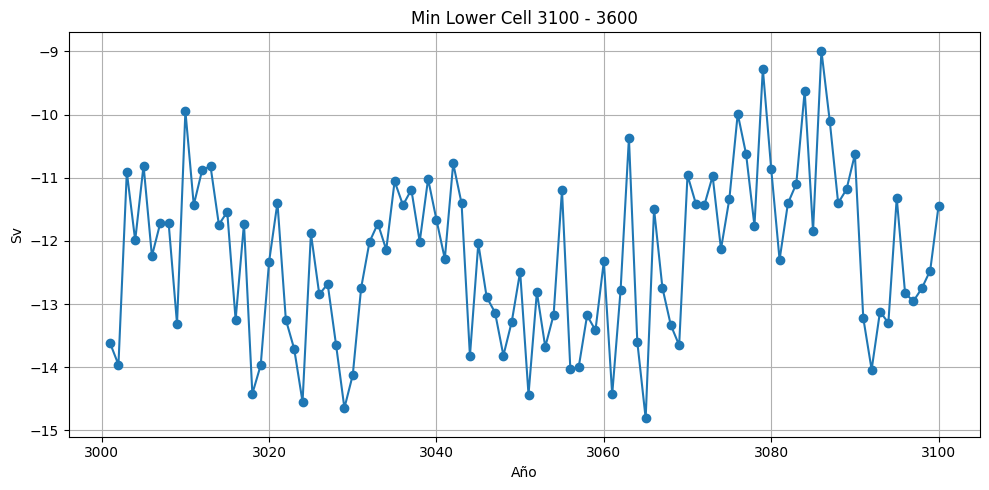

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

ruta_base = "/home/laura/Tesis"
flux_ds = xr.open_dataset(os.path.join(ruta_base, "30010101.ocean_flux.nc"))

ty_trans = flux_ds["ty_trans"]     
ty_trans_gm = flux_ds["ty_trans_gm"]
xt = flux_ds["xt_ocean"]
yu = flux_ds["yu_ocean"]
st = flux_ds["st_ocean"]


lon_mask_so = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))
lat_mask_so = (yu >= -68) & (yu <= -30)
sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -68) & (yu < -31)

mask_2d_so = (
    xr.where(lat_mask_so, 1.0, 0.0) * xr.where(lon_mask_so, 1.0, 0.0) +
    xr.where(sqr_mask_x, 1.0, 0.0) * xr.where(sqr_mask_y, 1.0, 0.0)
)


lon_mask_pac = ((xt >= 0) & (xt <= 121)) | ((xt >= 223) & (xt <= 360))
lat_mask_pac = (yu >= -30) & (yu <= 64)

mask_2d_pac = xr.where(lat_mask_pac, 1.0, 0.0) * xr.where(lon_mask_pac, 1.0, 0.0)


mask_2d_total = xr.where(mask_2d_so + mask_2d_pac > 0, 1.0, 0.0)


mask_3d = mask_2d_total.expand_dims({"st_ocean": st.size}, axis=0)
mask_3d = mask_3d.transpose("st_ocean", "yu_ocean", "xt_ocean") 


total_ty_masked = ty_trans * mask_3d
total_ty_masked_gm = ty_trans_gm * mask_3d


total_ty_zonal_gm = total_ty_masked_gm.sum(dim="xt_ocean")
total_ty_zonal = total_ty_masked.sum(dim="xt_ocean")


amoc_total = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_zonal_gm


lat_sel = (yu >= -42) & (yu <= -38)
depth_sel = (st >= 1800) & (st <= 2600)

amoc_sel = amoc_total.sel(yu_ocean=lat_sel, st_ocean=depth_sel)


time_sel = flux_ds["time"].dt.year > 2910
amoc_sel_time = amoc_sel.sel(time=time_sel)
years_sel = flux_ds["time"].sel(time=time_sel).dt.year.values

# time_sel = (flux_ds["time"].dt.year > 2910) & (flux_ds["time"].dt.year < 3100)
# amoc_sel_time = amoc_sel.sel(time=time_sel)
# years_sel = flux_ds["time"].sel(time=time_sel).dt.year.values



amoc_max_series = amoc_sel_time.max(dim=["st_ocean", "yu_ocean"]).values


plt.figure(figsize=(10, 5))
plt.plot(years_sel, amoc_max_series, marker='o')
plt.title("Min Lower Cell 3100 - 3600")
plt.xlabel("Año")
plt.ylabel("Sv")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_7308/3674257922.py:19: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds_ref = xr.open_dataset(os.path.join(ruta_base, archivos[0]))
/tmp/ipykernel_7308/3674257922.py:19: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  flux_ds_ref = xr.open_dataset(os.path.join(ruta_base, archivos[0]))
/tmp/ipykernel_7308/3674257922.py:57: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  flux_ds = xr.open_dataset(os.p

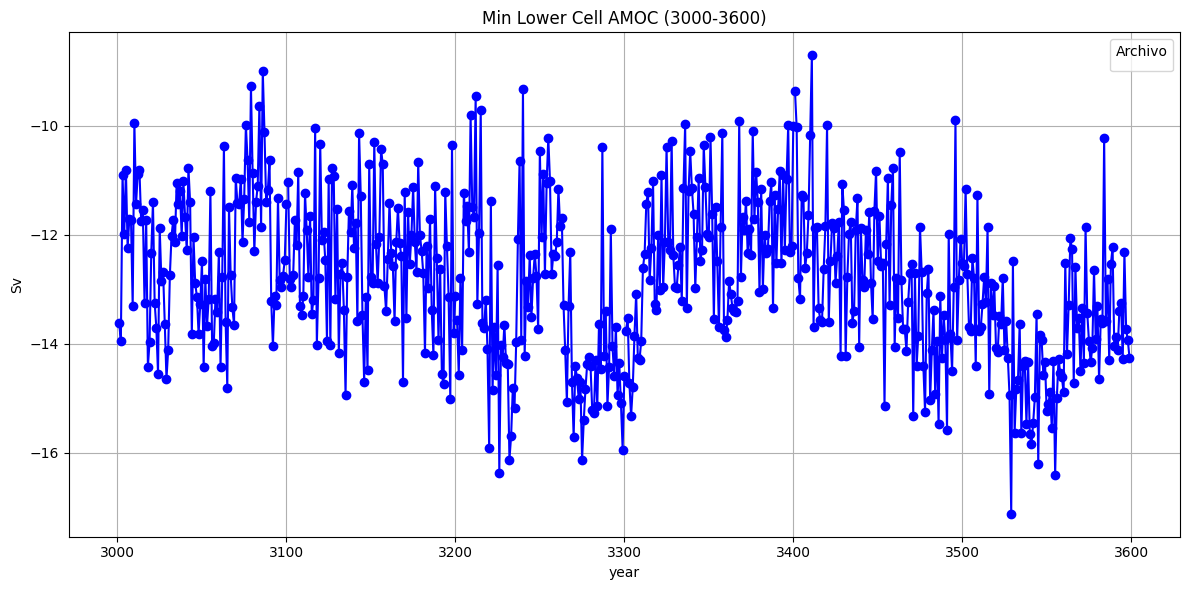

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

# === Definir ruta base y archivos ===
ruta_base = "/home/laura/Tesis"
archivos = [
    "30010101.ocean_flux.nc",
    "31010101.ocean_flux.nc",
    "32010101.ocean_flux.nc",
    "33010101.ocean_flux.nc",
    "34010101.ocean_flux.nc",
    "35010101.ocean_flux.nc"
]

# === Definir máscaras fijas (solo se leen una vez) ===
# Abrir primer archivo para obtener grillas
flux_ds_ref = xr.open_dataset(os.path.join(ruta_base, archivos[0]))
xt = flux_ds_ref["xt_ocean"]
yu = flux_ds_ref["yu_ocean"]
st = flux_ds_ref["st_ocean"]

# Máscara Océano Austral
lon_mask_so = ((xt >= 0) & (xt <= 125)) | ((xt >= 131) & (xt <= 360))
lat_mask_so = (yu >= -68) & (yu <= -30)
sqr_mask_x = (xt > 125) & (xt < 131)
sqr_mask_y = (yu > -68) & (yu < -31)

mask_2d_so = (
    xr.where(lat_mask_so, 1.0, 0.0) * xr.where(lon_mask_so, 1.0, 0.0) +
    xr.where(sqr_mask_x, 1.0, 0.0) * xr.where(sqr_mask_y, 1.0, 0.0)
)

# Máscara Pacífico
lon_mask_pac = ((xt >= 0) & (xt <= 121)) | ((xt >= 223) & (xt <= 360))
lat_mask_pac = (yu >= -30) & (yu <= 64)

mask_2d_pac = xr.where(lat_mask_pac, 1.0, 0.0) * xr.where(lon_mask_pac, 1.0, 0.0)

# Máscara combinada
mask_2d_total = xr.where(mask_2d_so + mask_2d_pac > 0, 1.0, 0.0)

# Expandir máscara a 3D
mask_3d = mask_2d_total.expand_dims({"st_ocean": st.size}, axis=0)
mask_3d = mask_3d.transpose("st_ocean", "yu_ocean", "xt_ocean")

# === Configuración para selección espacial ===
lat_sel = (yu >= -42) & (yu <= -38)
depth_sel = (st >= 1800) & (st <= 2600)

# === Crear figura ===
plt.figure(figsize=(12, 6))

# === Recorrer archivos y graficar ===
for archivo in archivos:
    flux_ds = xr.open_dataset(os.path.join(ruta_base, archivo))
    ty_trans = flux_ds["ty_trans"]
    ty_trans_gm = flux_ds["ty_trans_gm"]

    # Aplicar máscara y sumar zonal
    total_ty_masked = ty_trans * mask_3d
    total_ty_masked_gm = ty_trans_gm * mask_3d

    total_ty_zonal = total_ty_masked.sum(dim="xt_ocean")
    total_ty_zonal_gm = total_ty_masked_gm.sum(dim="xt_ocean")

    amoc_total = total_ty_zonal.cumsum(dim="st_ocean") + total_ty_zonal_gm

    # Seleccionar región
    amoc_sel = amoc_total.sel(yu_ocean=lat_sel, st_ocean=depth_sel)

    # Seleccionar años deseados
    time_sel = (flux_ds["time"].dt.year > 2910) & (flux_ds["time"].dt.year < 3600)
    amoc_sel_time = amoc_sel.sel(time=time_sel)
    years_sel = flux_ds["time"].sel(time=time_sel).dt.year.values

    # AMOC máximo por tiempo
    amoc_max_series = amoc_sel_time.max(dim=["st_ocean", "yu_ocean"]).values

    # Graficar
    # plt.plot(years_sel, amoc_max_series, marker='o', label=archivo[:8])
    # Graficar todas en negro
    plt.plot(years_sel, amoc_max_series, marker='o', color='blue')


# === Detalles de la figura ===
plt.title("Min Lower Cell AMOC (3000-3600)")
plt.xlabel("year")
plt.ylabel("Sv")
plt.grid(True)
plt.legend(title="Archivo")
plt.tight_layout()
plt.show()
